In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import os
import re  
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import date

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
current_directory = os.getcwd()

company_tweet = pd.read_csv(current_directory + '/input/tweets-about-the-top-companies-from-2015-to-2020/Company_Tweet.csv')
tweet = pd.read_csv(current_directory + '/input/tweets-about-the-top-companies-from-2015-to-2020/Tweet.csv')
company = pd.read_csv(current_directory + '/input/tweets-about-the-top-companies-from-2015-to-2020/Company.csv')

In [3]:
def quick_analysis(df):
    print("Data info:")
    print(df.info())
    print("-"*40 + "\n\n" + "Rows and Columns:")
    print(df.shape)
    print("-"*40 + "\n\n" + "Null Values:")
    print(df.apply(lambda x: sum(x.isnull())))
    print("-"*40 + "\n\n" + "Describes:")
    print(df.describe())

In [4]:
quick_analysis(company)
company.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes
None
----------------------------------------

Rows and Columns:
(6, 2)
----------------------------------------

Null Values:
ticker_symbol    0
company_name     0
dtype: int64
----------------------------------------

Describes:
       ticker_symbol company_name
count              6            6
unique             6            5
top             AAPL   Google Inc
freq               1            2


,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc


In [5]:
quick_analysis(company_tweet)
company_tweet.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB
None
----------------------------------------

Rows and Columns:
(4336445, 2)
----------------------------------------

Null Values:
tweet_id         0
ticker_symbol    0
dtype: int64
----------------------------------------

Describes:
           tweet_id
count  4.336445e+06
mean   8.834282e+17
std    1.927735e+17
min    5.504415e+17
25%    7.185450e+17
50%    8.825934e+17
75%    1.054776e+18
max    1.212160e+18


,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [6]:
quick_analysis(tweet)
tweet.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB
None
----------------------------------------

Rows and Columns:
(3717964, 7)
----------------------------------------

Null Values:
tweet_id           0
writer         47273
post_date          0
body               0
comment_num        0
retweet_num        0
like_num           0
dtype: int64
----------------------------------------

Describes:
           tweet_id     post_date   comment_num   retweet_num      like_num
count  3.717964e+06  3.717964e+06  3.717964e+06  3.717964e+06  3.717964e+06
mean   8.797444e+17  1.498582e+09  3.123642e-01  6.214807e-01  2.219982e+00
std    1.924039e+17  4.587

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [7]:
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")
tweet_df['date_time'] = tweet_df['post_date'].apply(lambda post_date: pd.to_datetime(post_date, unit='s'))
tweet_df['date'] = tweet_df['date_time'].dt.date
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]
tweet_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date_time,date,total_engangement
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01 23:59:49,2015-01-01,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01 23:59:49,2015-01-01,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1


In [8]:
def remove_special_character(tweet):
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [9]:
tweet_df["tweet"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet)).str.lower()
tweet_df.sample(5)

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date_time,date,total_engangement,tweet
2585172,619681784217755648,AMZN,leahanneta,1436578625,"CSCO Cisco Systems, Inc. Newshttp://dlvr.it/BT...",0,0,0,2015-07-11 01:37:05,2015-07-11,0,"csco cisco systems, inc. news"
3139602,653385022083174401,MSFT,cooldude42069,1444614103,damn cashtags $msft come on.,0,0,0,2015-10-12 01:41:43,2015-10-12,0,damn cashtags $msft come on.
539112,709399079047045121,AAPL,TradingGuru,1457968895,"RT $QQQ HFT Algos triggered SELL in SIGMA-X, C...",0,0,0,2016-03-14 15:21:35,2016-03-14,0,"$qqq hft algos triggered sell in sigma-x, cros..."
2185242,1001800054296854529,MSFT,SeekingAlpha,1527682720,$SPY $QQQ $AMZN $BAYRY $BORGN $CRM $DIS $FB $G...,0,2,0,2018-05-30 12:18:40,2018-05-30,2,$spy $qqq $amzn $bayry $borgn $crm $dis $fb $g...
4181208,1138721517569748992,TSLA,MBAvaluehound,1560327340,Excellent summary by @jowens510 on $TSLA share...,0,0,0,2019-06-12 08:15:40,2019-06-12,0,excellent summary by @jowens on $tsla sharehol...


<AxesSubplot:xlabel='date'>

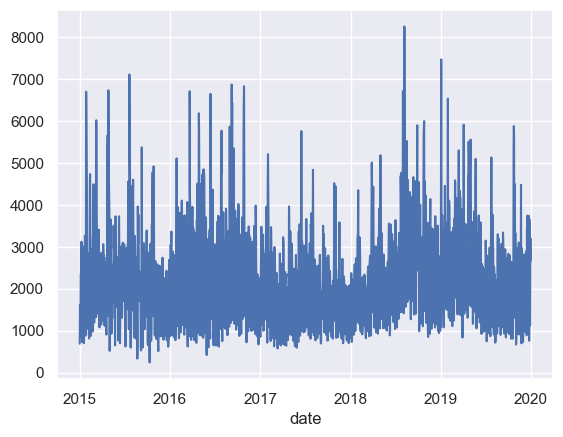

In [10]:
tweets_per_day = tweet_df.groupby(tweet_df['date']).size()
tweets_per_day.plot()

In [11]:
afinn = Afinn()

vaderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [12]:
tweet_df['afinn_score'] = tweet_df['tweet'].apply(lambda tweet: afinn.score(tweet))
tweet_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date_time,date,total_engangement,tweet,afinn_score
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01 23:59:49,2015-01-01,1,toptickertweets $aapl $imrs $baba $ebay $amzn ...,0.0
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01 23:59:49,2015-01-01,1,toptickertweets $aapl $imrs $baba $ebay $amzn ...,0.0
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0


In [13]:
tweet_df['vader_score_compound'] = tweet_df['body'].apply(lambda body: vaderSentimentAnalyzer.polarity_scores(body)['compound'])
tweet_df['vader_score_neg'] = tweet_df['body'].apply(lambda body: vaderSentimentAnalyzer.polarity_scores(body)['neg'])
tweet_df['vader_score_neu'] = tweet_df['body'].apply(lambda body: vaderSentimentAnalyzer.polarity_scores(body)['neu'])
tweet_df['vader_score_pos'] = tweet_df['body'].apply(lambda body: vaderSentimentAnalyzer.polarity_scores(body)['pos'])
tweet_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date_time,date,total_engangement,tweet,afinn_score,vader_score_compound,vader_score_neg,vader_score_neu,vader_score_pos
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01 23:59:49,2015-01-01,1,toptickertweets $aapl $imrs $baba $ebay $amzn ...,0.0,0.0,0.0,1.0,0.0
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01 23:59:49,2015-01-01,1,toptickertweets $aapl $imrs $baba $ebay $amzn ...,0.0,0.0,0.0,1.0,0.0
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0,0.0,0.0,1.0,0.0
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0,0.0,0.0,1.0,0.0
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0,0.0,0.0,1.0,0.0


In [14]:
vader_score_neg_threshold = -0.05
vader_score_pos_threshold = 0.05

def get_vader_sentiment(score):
    if score <= vader_score_neg_threshold:
        return "Negative"
    elif score >= vader_score_pos_threshold:
        return "Positive"
    return "Neutral"

In [15]:
tweet_df['vader_sentiment'] = tweet_df['vader_score_compound'].apply(lambda score: get_vader_sentiment(score))
tweet_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date_time,date,total_engangement,tweet,afinn_score,vader_score_compound,vader_score_neg,vader_score_neu,vader_score_pos,vader_sentiment
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01 23:59:49,2015-01-01,1,toptickertweets $aapl $imrs $baba $ebay $amzn ...,0.0,0.0,0.0,1.0,0.0,Neutral
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01 23:59:49,2015-01-01,1,toptickertweets $aapl $imrs $baba $ebay $amzn ...,0.0,0.0,0.0,1.0,0.0,Neutral
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0,0.0,0.0,1.0,0.0,Neutral
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0,0.0,0.0,1.0,0.0,Neutral
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01 23:59:48,2015-01-01,1,sentishiftup $k $fb $googl $gs $gold $t $aapl ...,2.0,0.0,0.0,1.0,0.0,Neutral


<AxesSubplot:xlabel='date_time'>

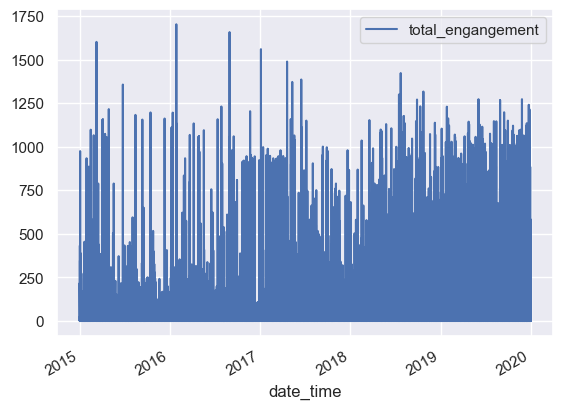

In [16]:
tweet_df.plot(x='date_time', y='total_engangement')

In [17]:
processed_file_path = current_directory + '/input/processed_data/tweets.csv'
tweet_df.to_csv(processed_file_path, index=False)